In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
df= pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
train_df=df.sample(frac=0.75, random_state=4)
val_df=df.drop(train_df.index)

In [ ]:
max_val=train_df.max(axis=0)
min_val=train_df.min(axis=0)
range = max_val-min_val
train_df= (train_df-min_val)/range
val_df= (val_df-min_val)/range

In [ ]:
x_train=train_df.drop('quality', axis=1)
x_val=val_df.drop('quality', axis=1)
y_train=train_df['quality']
y_val=val_df['quality']
input_shape= [x_train.shape[1]]
input_shape

[11]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=input_shape)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation= 'relu', input_shape=input_shape),
     tf.keras.layers.Dense(units=64, activation= 'relu'),
     tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mae')

In [ ]:
losses= model.fit(x_train,y_train, validation_data=(x_val,y_val),batch_size=256, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 89ms/step - loss: 0.4493 - val_loss: 0.3300
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.2561 - val_loss: 0.1473
Epoch 3/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1311 - val_loss: 0.1396
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1536 - val_loss: 0.1515
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1414 - val_loss: 0.1228
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1201 - val_loss: 0.1169
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1212 - val_loss: 0.1196
Epoch 8/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1208 - val_loss: 0.1138
Epoch 9/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1148 - val_loss: 0.1115
Epoch 10/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1128 - val_loss: 0.1113


<Axes: >

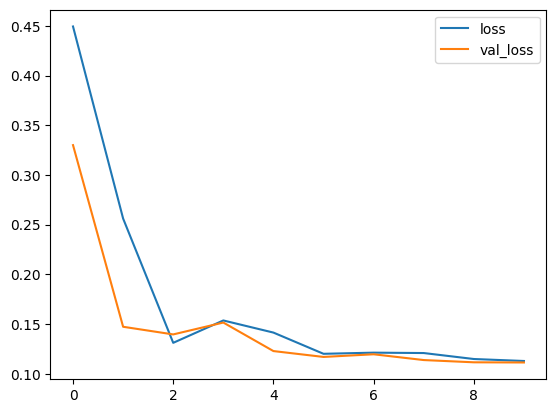

In [ ]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()
